## Stock Market Prediction

In [1]:
!pip install pandas-datareader

In [2]:
!pip install keras

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
### Data Collection
import pandas_datareader as pdr
key="0d06a7903ca71200a1390ea8fe2a54db31db6dd4"

In [10]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\abhis\AppData\Local\Temp\ipykernel_19048\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [11]:
df.to_csv('AAPL.csv')

In [12]:
import pandas as pd

In [13]:
df=pd.read_csv('AAPL.csv')

In [14]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-09-06 00:00:00+00:00,223.10,227.35,221.30,226.23,34289976,53.413675,54.431192,52.982726,54.163047,137159904,0.0,1.0
1,AAPL,2018-09-07 00:00:00+00:00,221.30,225.37,220.71,221.85,37619810,52.982726,53.957149,52.841471,53.114405,150479240,0.0,1.0
2,AAPL,2018-09-10 00:00:00+00:00,218.33,221.85,216.47,220.95,39516453,52.271661,53.114405,51.826348,52.898931,158065812,0.0,1.0
3,AAPL,2018-09-11 00:00:00+00:00,223.85,224.30,216.56,218.01,35749049,53.593237,53.700974,51.847895,52.195048,142996196,0.0,1.0
4,AAPL,2018-09-12 00:00:00+00:00,221.07,225.00,219.84,224.94,49278740,52.927661,53.868565,52.633179,53.854200,197114960,0.0,1.0


In [15]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-08-28 00:00:00+00:00,180.19,180.59,178.545,180.090,43820697,180.19,180.59,178.545,180.090,43820697,0.0,1.0
1252,AAPL,2023-08-29 00:00:00+00:00,184.12,184.90,179.500,179.695,53003948,184.12,184.90,179.500,179.695,53003948,0.0,1.0
1253,AAPL,2023-08-30 00:00:00+00:00,187.65,187.85,184.740,184.940,60813888,187.65,187.85,184.740,184.940,60813888,0.0,1.0
1254,AAPL,2023-08-31 00:00:00+00:00,187.87,189.12,187.480,187.840,60794467,187.87,189.12,187.480,187.840,60794467,0.0,1.0
1255,AAPL,2023-09-01 00:00:00+00:00,189.46,189.92,188.280,189.485,45766503,189.46,189.92,188.280,189.485,45766503,0.0,1.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1256 non-null   object 
 1   date         1256 non-null   object 
 2   close        1256 non-null   float64
 3   high         1256 non-null   float64
 4   low          1256 non-null   float64
 5   open         1256 non-null   float64
 6   volume       1256 non-null   int64  
 7   adjClose     1256 non-null   float64
 8   adjHigh      1256 non-null   float64
 9   adjLow       1256 non-null   float64
 10  adjOpen      1256 non-null   float64
 11  adjVolume    1256 non-null   int64  
 12  divCash      1256 non-null   float64
 13  splitFactor  1256 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.5+ KB


In [17]:
df1=df.reset_index()['open']

In [18]:
df1

0       226.230
1       221.850
2       220.950
3       218.010
4       224.940
         ...   
1251    180.090
1252    179.695
1253    184.940
1254    187.840
1255    189.485
Name: open, Length: 1256, dtype: float64

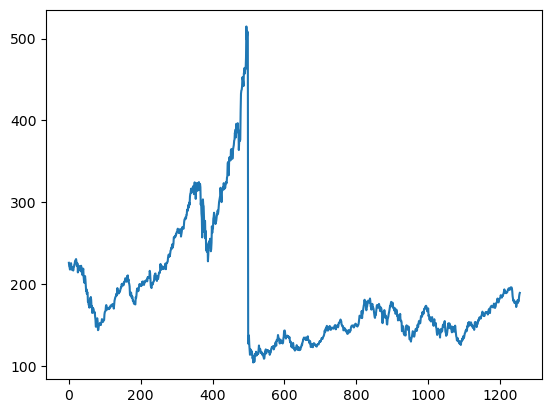

In [19]:
plt.plot(df1)

In [20]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
print(df1)

[[0.29662401]
 [0.28594759]
 [0.28375381]
 ...
 [0.19597806]
 [0.20304692]
 [0.20705667]]


In [23]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
training_size,test_size

(816, 440)

In [25]:
train_data

array([[0.29662401],
       [0.28594759],
       [0.28375381],
       [0.27658745],
       [0.29347959],
       [0.29001828],
       [0.29545399],
       [0.28667885],
       [0.27605119],
       [0.27778184],
       [0.28202316],
       [0.28333943],
       [0.27368678],
       [0.28082876],
       [0.28387569],
       [0.29074954],
       [0.29311395],
       [0.30081658],
       [0.2991103 ],
       [0.30593541],
       [0.30771481],
       [0.30084095],
       [0.28682511],
       [0.29031079],
       [0.29474711],
       [0.26808044],
       [0.28246191],
       [0.28426569],
       [0.27882998],
       [0.28704449],
       [0.27622182],
       [0.27670932],
       [0.28092626],
       [0.27127361],
       [0.28777575],
       [0.27585619],
       [0.27144424],
       [0.27946374],
       [0.25986594],
       [0.27383303],
       [0.27912249],
       [0.25596587],
       [0.2431688 ],
       [0.23736746],
       [0.24723949],
       [0.25701402],
       [0.24621572],
       [0.230

In [26]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [27]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [29]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [30]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
import tensorflow as tf
# !pip install tensorflow scikeras scikit-learn

In [32]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(100,1),dropout=0.2))
           
model.add(LSTM(units=50,return_sequences=True,dropout=0.2))
                   
model.add(LSTM(units=50,dropout=0.2))
               
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 27s 826ms/step - loss: 0.0310 - val_loss: 0.0011
Epoch 2/100
12/12 [==============================] - 6s 466ms/step - loss: 0.0125 - val_loss: 9.4045e-04
Epoch 3/100
12/12 [==============================] - 5s 446ms/step - loss: 0.0105 - val_loss: 3.6357e-04
Epoch 4/100
12/12 [==============================] - 5s 405ms/step - loss: 0.0095 - val_loss: 4.9631e-04
Epoch 5/100
12/12 [==============================] - 5s 455ms/step - loss: 0.0091 - val_loss: 4.6964e-04
Epoch 6/100
12/12 [==============================] - 5s 433ms/step - loss: 0.0086 - val_loss: 0.0011
Epoch 7/100
12/12 [==============================] - 5s 430ms/step - loss: 0.0082 - val_loss: 7.8583e-04
Epoch 8/100
12/12 [==============================] - 5s 432ms/step - loss: 0.0087 - val_loss: 0.0012
Epoch 9/100
12/12 [==============================] - 5s 425ms/step - loss: 0.0077 - val_loss: 5.3763e-04
Epoch 10/100
12/12 [==============================] - 5s 427ms/ste

12/12 [==============================] - 3s 253ms/step - loss: 0.0058 - val_loss: 5.8038e-04
Epoch 79/100
12/12 [==============================] - 3s 247ms/step - loss: 0.0048 - val_loss: 3.8120e-04
Epoch 80/100
12/12 [==============================] - 3s 245ms/step - loss: 0.0046 - val_loss: 3.3157e-04
Epoch 81/100
12/12 [==============================] - 3s 246ms/step - loss: 0.0043 - val_loss: 3.1900e-04
Epoch 82/100
12/12 [==============================] - 3s 252ms/step - loss: 0.0045 - val_loss: 3.7321e-04
Epoch 83/100
12/12 [==============================] - 3s 249ms/step - loss: 0.0046 - val_loss: 4.2553e-04
Epoch 84/100
12/12 [==============================] - 3s 245ms/step - loss: 0.0046 - val_loss: 3.8977e-04
Epoch 85/100
12/12 [==============================] - 3s 244ms/step - loss: 0.0049 - val_loss: 2.5932e-04
Epoch 86/100
12/12 [==============================] - 3s 250ms/step - loss: 0.0051 - val_loss: 6.1673e-04
Epoch 87/100
12/12 [==============================] - 3s 25

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 38ms/step


In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

217.14867384276684

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

159.04784243750876

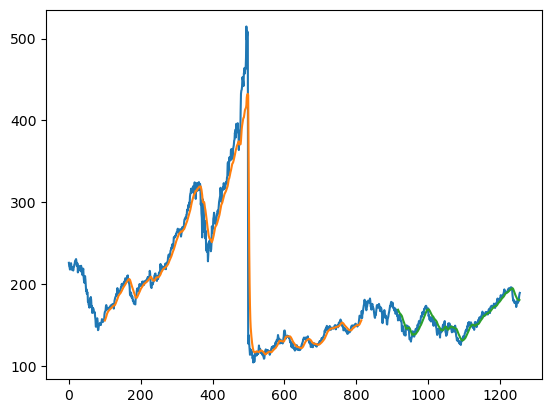

In [40]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# For 30 days prediction

In [41]:
len(test_data)

440

In [42]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [44]:
temp_input

[0.13815965874466785,
 0.13915904936014623,
 0.14637416209628273,
 0.14759293113954902,
 0.15005484460694696,
 0.1493235831809872,
 0.15003046922608165,
 0.14749542961608775,
 0.1473735527117611,
 0.1478366849482023,
 0.1426325411334552,
 0.1478366849482023,
 0.15588056063375988,
 0.1578062157221206,
 0.15978062157221207,
 0.15834247410115782,
 0.14710542352224248,
 0.16193784277879336,
 0.16560633759902493,
 0.16699573430834858,
 0.1669226081657526,
 0.16894576477757461,
 0.16838513101767216,
 0.1672638634978671,
 0.164411943936624,
 0.16372943327239486,
 0.16687385740402189,
 0.17513711151736738,
 0.16926264472882385,
 0.16719073735527112,
 0.16221815965874464,
 0.1654357099329677,
 0.1676538695917123,
 0.17652650822669103,
 0.17741620962827537,
 0.17833028641072513,
 0.18644728823887868,
 0.19034734917733087,
 0.18385131017672152,
 0.18013406459475928,
 0.178805606337599,
 0.187592931139549,
 0.18703229737964655,
 0.19076173065204144,
 0.19215112736136503,
 0.19358927483241922,
 0.2

In [45]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.19016224]
101
1 day input [0.13915905 0.14637416 0.14759293 0.15005484 0.14932358 0.15003047
 0.14749543 0.14737355 0.14783668 0.14263254 0.14783668 0.15588056
 0.15780622 0.15978062 0.15834247 0.14710542 0.16193784 0.16560634
 0.16699573 0.16692261 0.16894576 0.16838513 0.16726386 0.16441194
 0.16372943 0.16687386 0.17513711 0.16926264 0.16719074 0.16221816
 0.16543571 0.16765387 0.17652651 0.17741621 0.17833029 0.18644729
 0.19034735 0.18385131 0.18013406 0.17880561 0.18759293 0.1870323
 0.19076173 0.19215113 0.19358927 0.20034126 0.19468617 0.19588056
 0.19305302 0.19746496 0.20058501 0.19829372 0.2032663  0.20606947
 0.21228519 0.2175259  0.21212675 0.207922   0.21174893 0.20650823
 0.20626447 0.20753199 0.20953077 0.20887264 0.21294333 0.21647776
 0.21586837 0.22071907 0.21830591 0.21662401 0.21642901 0.21725777
 0.22298598 0.21969531 0.22308349 0.22351005 0.2205972  0.21213894
 0.19739183 0.18912858 0.18318099 0.18605728 0.1826691  0.17740402
 0.17898842 0.18120658 0.17694089 

9 day output [[0.19517714]]
10 day input [0.14263254 0.14783668 0.15588056 0.15780622 0.15978062 0.15834247
 0.14710542 0.16193784 0.16560634 0.16699573 0.16692261 0.16894576
 0.16838513 0.16726386 0.16441194 0.16372943 0.16687386 0.17513711
 0.16926264 0.16719074 0.16221816 0.16543571 0.16765387 0.17652651
 0.17741621 0.17833029 0.18644729 0.19034735 0.18385131 0.18013406
 0.17880561 0.18759293 0.1870323  0.19076173 0.19215113 0.19358927
 0.20034126 0.19468617 0.19588056 0.19305302 0.19746496 0.20058501
 0.19829372 0.2032663  0.20606947 0.21228519 0.2175259  0.21212675
 0.207922   0.21174893 0.20650823 0.20626447 0.20753199 0.20953077
 0.20887264 0.21294333 0.21647776 0.21586837 0.22071907 0.21830591
 0.21662401 0.21642901 0.21725777 0.22298598 0.21969531 0.22308349
 0.22351005 0.2205972  0.21213894 0.19739183 0.18912858 0.18318099
 0.18605728 0.1826691  0.17740402 0.17898842 0.18120658 0.17694089
 0.17696527 0.16516758 0.17191956 0.17677026 0.18032907 0.18557952
 0.17755027 0.184156 

17 day output [[0.1984537]]
18 day input [0.16560634 0.16699573 0.16692261 0.16894576 0.16838513 0.16726386
 0.16441194 0.16372943 0.16687386 0.17513711 0.16926264 0.16719074
 0.16221816 0.16543571 0.16765387 0.17652651 0.17741621 0.17833029
 0.18644729 0.19034735 0.18385131 0.18013406 0.17880561 0.18759293
 0.1870323  0.19076173 0.19215113 0.19358927 0.20034126 0.19468617
 0.19588056 0.19305302 0.19746496 0.20058501 0.19829372 0.2032663
 0.20606947 0.21228519 0.2175259  0.21212675 0.207922   0.21174893
 0.20650823 0.20626447 0.20753199 0.20953077 0.20887264 0.21294333
 0.21647776 0.21586837 0.22071907 0.21830591 0.21662401 0.21642901
 0.21725777 0.22298598 0.21969531 0.22308349 0.22351005 0.2205972
 0.21213894 0.19739183 0.18912858 0.18318099 0.18605728 0.1826691
 0.17740402 0.17898842 0.18120658 0.17694089 0.17696527 0.16516758
 0.17191956 0.17677026 0.18032907 0.18557952 0.17755027 0.184156
 0.18319317 0.19597806 0.20304692 0.20705667 0.19016224 0.19159608
 0.19241796 0.19290362 0.1

25 day output [[0.20167983]]
26 day input [0.16687386 0.17513711 0.16926264 0.16719074 0.16221816 0.16543571
 0.16765387 0.17652651 0.17741621 0.17833029 0.18644729 0.19034735
 0.18385131 0.18013406 0.17880561 0.18759293 0.1870323  0.19076173
 0.19215113 0.19358927 0.20034126 0.19468617 0.19588056 0.19305302
 0.19746496 0.20058501 0.19829372 0.2032663  0.20606947 0.21228519
 0.2175259  0.21212675 0.207922   0.21174893 0.20650823 0.20626447
 0.20753199 0.20953077 0.20887264 0.21294333 0.21647776 0.21586837
 0.22071907 0.21830591 0.21662401 0.21642901 0.21725777 0.22298598
 0.21969531 0.22308349 0.22351005 0.2205972  0.21213894 0.19739183
 0.18912858 0.18318099 0.18605728 0.1826691  0.17740402 0.17898842
 0.18120658 0.17694089 0.17696527 0.16516758 0.17191956 0.17677026
 0.18032907 0.18557952 0.17755027 0.184156   0.18319317 0.19597806
 0.20304692 0.20705667 0.19016224 0.19159608 0.19241796 0.19290362
 0.19326195 0.19360168 0.19396301 0.19435133 0.1947592  0.19517714
 0.1955976  0.196016

In [46]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [47]:
import matplotlib.pyplot as plt

In [48]:
len(df1)

1256

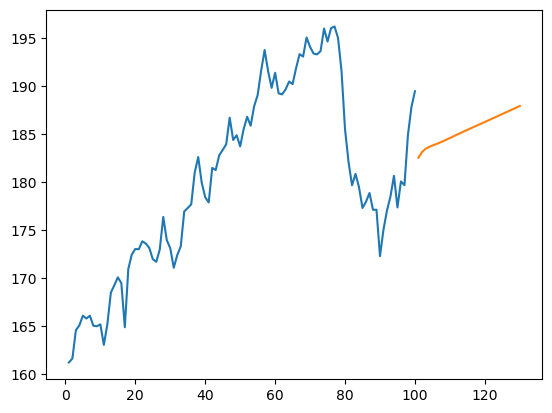

In [49]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

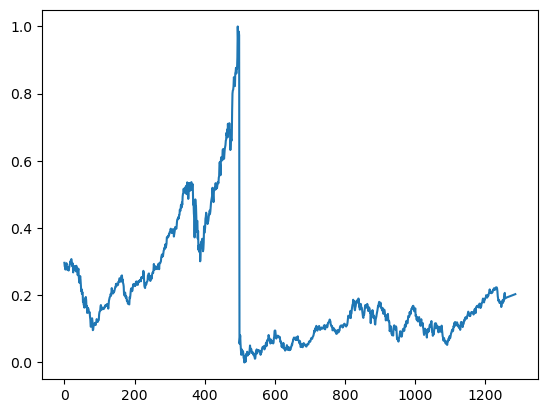

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[0:])

In [51]:
df3=scaler.inverse_transform(df3).tolist()

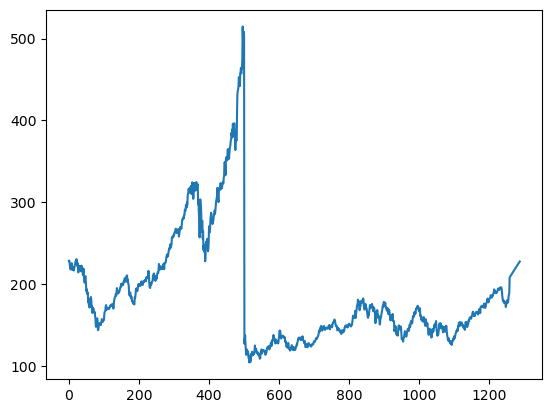

In [78]:
plt.plot(df3)